In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

labels = pd.read_excel("aggregateRockData.xlsx",header=None)[1]
features = pd.read_csv("feature_presence540.txt", delim_whitespace=True, usecols=range(1,14),header=None)

In [3]:
features.sample(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13
525,23,18,0.05,0.00,0.10,0.0,0.35,0.20,0.45,0.00,0.0,0.0,0.00
57,4,10,0.00,0.00,0.00,0.0,0.05,0.05,0.05,0.05,0.0,0.0,0.10
202,13,11,0.00,0.00,0.90,0.0,0.10,0.10,0.05,0.05,0.0,0.0,0.05
173,11,14,0.05,0.00,0.00,0.0,0.00,0.00,0.05,0.40,0.0,0.0,0.05
380,24,13,0.05,1.00,0.00,0.0,0.00,0.00,0.00,0.05,0.0,0.0,0.05
411,26,12,0.00,0.00,0.00,0.0,0.20,0.05,0.00,0.30,0.0,0.0,0.10
420,27,5,0.00,0.00,0.30,0.0,0.10,0.10,0.05,0.10,0.0,0.0,0.10
278,18,7,0.00,0.00,0.20,0.0,0.35,0.10,0.05,0.05,0.0,0.0,0.20
325,21,6,0.00,0.00,0.00,0.0,0.10,0.00,0.85,0.05,0.0,0.0,0.00
27,2,12,0.00,0.10,0.00,0.0,0.00,0.05,0.00,0.15,0.0,0.0,0.20


In [4]:
labels.head()

0    1
1    1
2    1
3    1
4    1
Name: 1, dtype: int64

In [5]:
combined_data = pd.concat([labels, features], axis=1)

temp_df = combined_data
temp_df.head()

,1,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,1,1,0.20,0.15,0.00,0.0,0.00,0.05,0.0,0.30,0.0,0.00,0.10
1,1.0,1,2,0.65,0.15,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.05,0.05
2,1.0,1,3,0.60,0.00,0.00,0.0,0.05,0.00,0.0,0.35,0.0,0.00,0.05
3,1.0,1,4,0.10,0.85,0.00,0.0,0.05,0.00,0.0,0.10,0.0,0.00,0.10
4,1.0,1,5,0.35,0.80,0.00,0.0,0.00,0.00,0.0,0.10,0.0,0.00,0.05


In [6]:
df = temp_df.iloc[:480]
len(df)

480

In [7]:
column_names = [
"Rock category number",
"Subtype number",
"Token number",
"Angular fragments",
"Rounded fragments",
"Straight stripes",
"Curved stripes",
"Physical layers",
"Veins",
"Oily/shimmery texture",
"Splotchy texture",
"Single translucent crystal",
"Multiple cubic crystals",
"Sandy texture",
]
df.columns=column_names
# df.head()
df.sample(10)

,Rock category number,Subtype number,Token number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
172,2.0,11,13,0.00,0.00,0.05,0.0,0.00,0.10,0.10,0.05,0.00,0.00,0.35
365,3.0,23,14,0.00,0.00,0.20,0.0,0.15,0.10,0.60,0.05,0.15,0.00,0.00
94,1.0,6,15,0.00,0.00,0.00,0.0,0.10,0.05,0.75,0.10,0.00,0.00,0.00
216,2.0,14,9,0.00,0.00,0.00,0.0,0.10,0.15,0.15,0.05,0.00,0.00,0.00
180,2.0,12,5,0.00,0.00,0.00,0.0,0.20,0.00,0.85,0.00,0.00,0.00,0.00
97,1.0,7,2,0.10,0.15,0.00,0.0,0.00,0.05,0.10,0.35,0.00,0.00,0.05
327,3.0,21,8,0.00,0.00,0.00,0.0,0.20,0.00,0.55,0.05,0.00,0.00,0.05
443,3.0,28,12,0.00,0.00,0.00,0.0,0.00,0.00,0.05,0.00,0.95,0.00,0.00
21,1.0,2,6,0.00,0.00,0.00,0.0,0.15,0.15,0.00,0.10,0.00,0.00,0.10
166,2.0,11,7,0.15,0.20,0.00,0.0,0.00,0.00,0.00,0.25,0.00,0.05,0.05


In [8]:
df.shape

(480, 14)

In [9]:
df.describe()

,Rock category number,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,2.000000,0.042292,0.165146,0.052396,0.144479,0.141458,0.031667,0.025104,0.119854
std,0.817348,0.160970,0.216635,0.102676,0.265689,0.168222,0.135647,0.112153,0.173149
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000,0.050000
75%,3.000000,0.000000,0.212500,0.050000,0.100000,0.200000,0.000000,0.000000,0.150000
max,3.000000,1.000000,0.950000,0.900000,1.000000,0.950000,1.000000,1.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Rock category number        480 non-null    float64
 1   Subtype number              480 non-null    object 
 2   Token number                480 non-null    object 
 3   Angular fragments           480 non-null    object 
 4   Rounded fragments           480 non-null    object 
 5   Straight stripes            480 non-null    object 
 6   Curved stripes              480 non-null    float64
 7   Physical layers             480 non-null    float64
 8   Veins                       480 non-null    float64
 9   Oily/shimmery texture       480 non-null    float64
 10  Splotchy texture            480 non-null    float64
 11  Single translucent crystal  480 non-null    float64
 12  Multiple cubic crystals     480 non-null    float64
 13  Sandy texture               480 non

In [11]:
df.isnull().sum()

Rock category number          0
Subtype number                0
Token number                  0
Angular fragments             0
Rounded fragments             0
Straight stripes              0
Curved stripes                0
Physical layers               0
Veins                         0
Oily/shimmery texture         0
Splotchy texture              0
Single translucent crystal    0
Multiple cubic crystals       0
Sandy texture                 0
dtype: int64

In [12]:
df['Token number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16'], dtype=object)

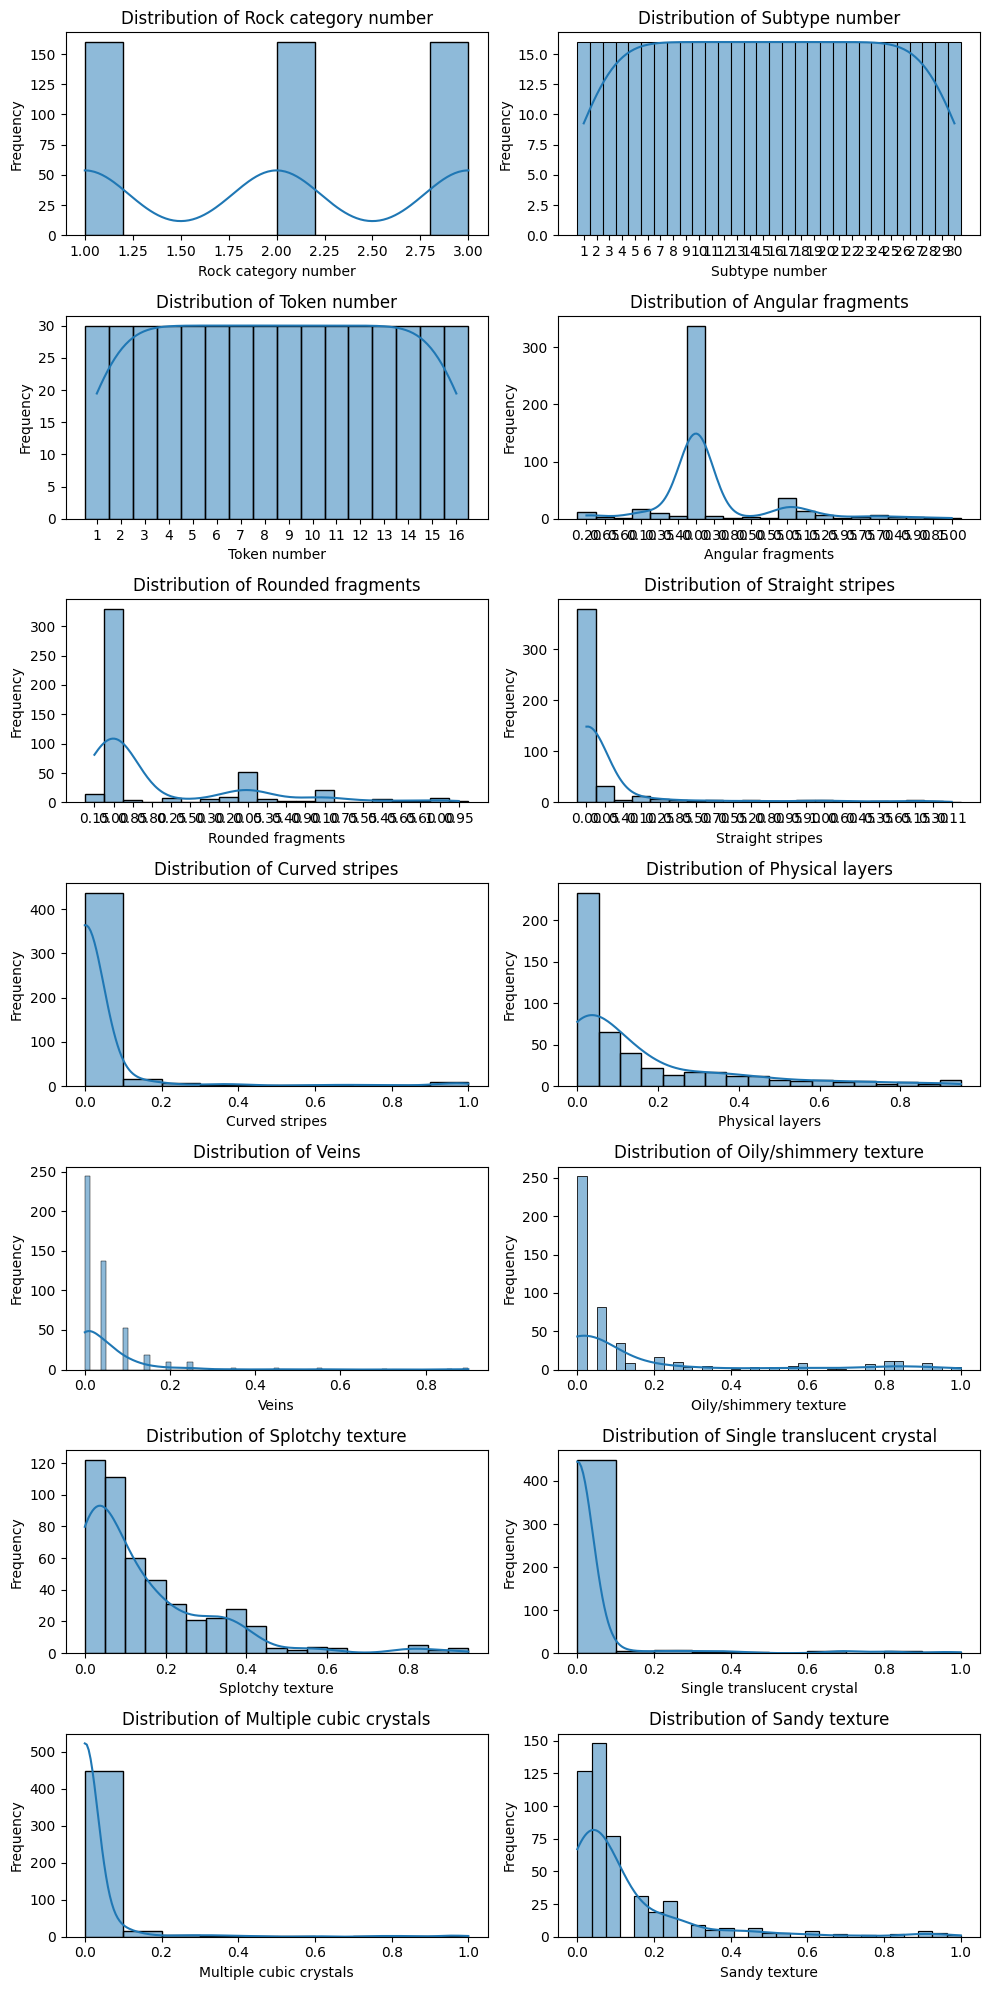

In [12]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(df.columns):
    plt.subplot(7, 2, i+1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

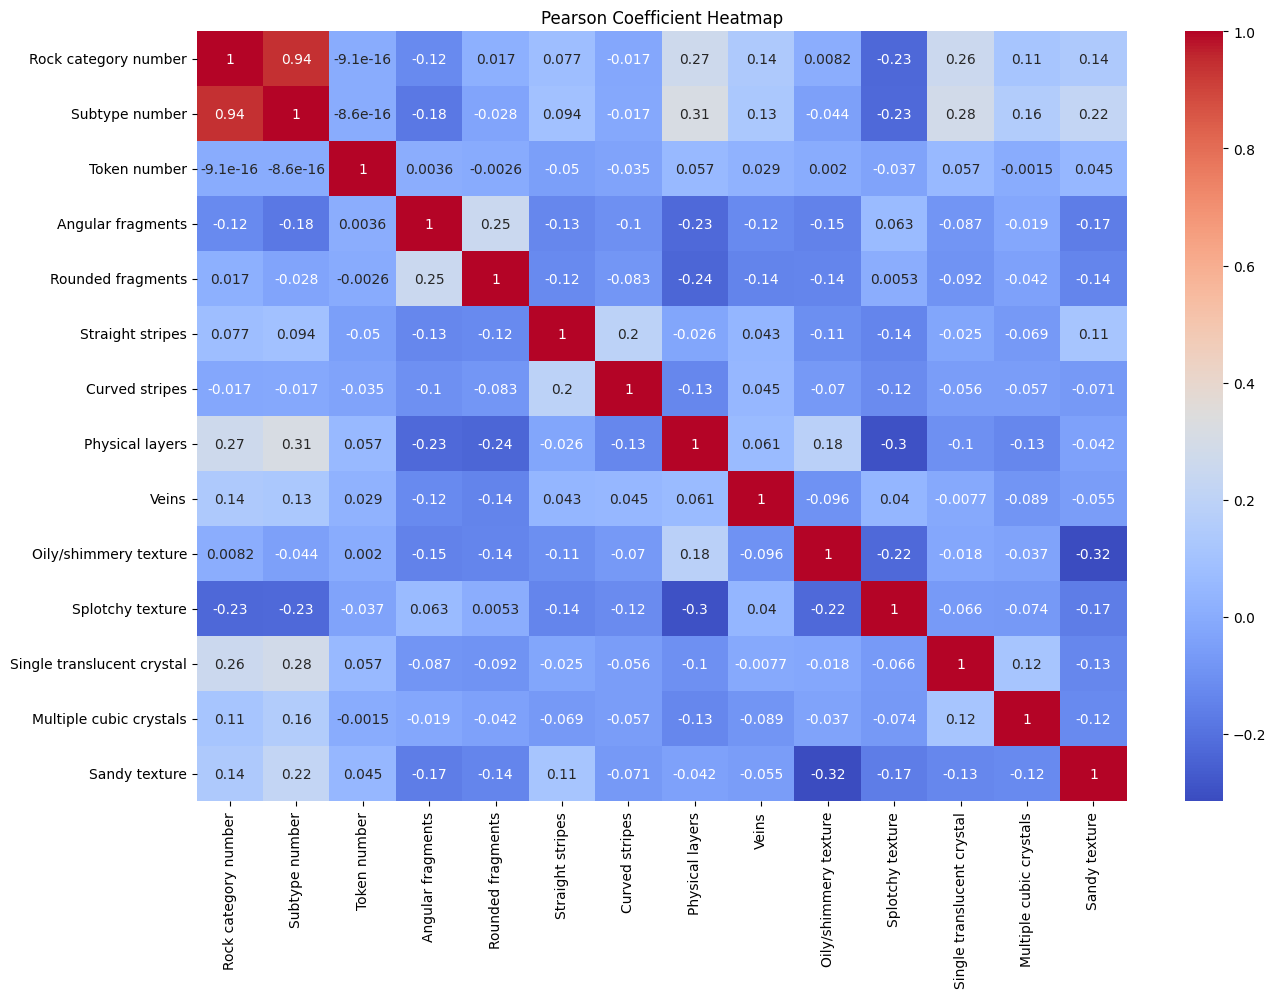

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot = True, cmap= 'coolwarm' )
plt.title('Pearson Coefficient Heatmap')
plt.show()

In [13]:
df.corr(method='pearson', numeric_only=True)

,Rock category number,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
Rock category number,1.000000,-0.017454,0.266699,0.140553,0.008172,-0.229273,0.258910,0.113872,0.139845
Curved stripes,-0.017454,1.000000,-0.134700,0.045330,-0.070313,-0.116348,-0.056443,-0.056908,-0.071011
Physical layers,0.266699,-0.134700,1.000000,0.061391,0.184191,-0.295079,-0.102496,-0.131038,-0.041839
Veins,0.140553,0.045330,0.061391,1.000000,-0.095940,0.040470,-0.007707,-0.089083,-0.054820
Oily/shimmery texture,0.008172,-0.070313,0.184191,-0.095940,1.000000,-0.224798,-0.018165,-0.037376,-0.315414
Splotchy texture,-0.229273,-0.116348,-0.295079,0.040470,-0.224798,1.000000,-0.065659,-0.073539,-0.166148
Single translucent crystal,0.258910,-0.056443,-0.102496,-0.007707,-0.018165,-0.065659,1.000000,0.115054,-0.134821
Multiple cubic crystals,0.113872,-0.056908,-0.131038,-0.089083,-0.037376,-0.073539,0.115054,1.000000,-0.123013
Sandy texture,0.139845,-0.071011,-0.041839,-0.054820,-0.315414,-0.166148,-0.134821,-0.123013,1.000000


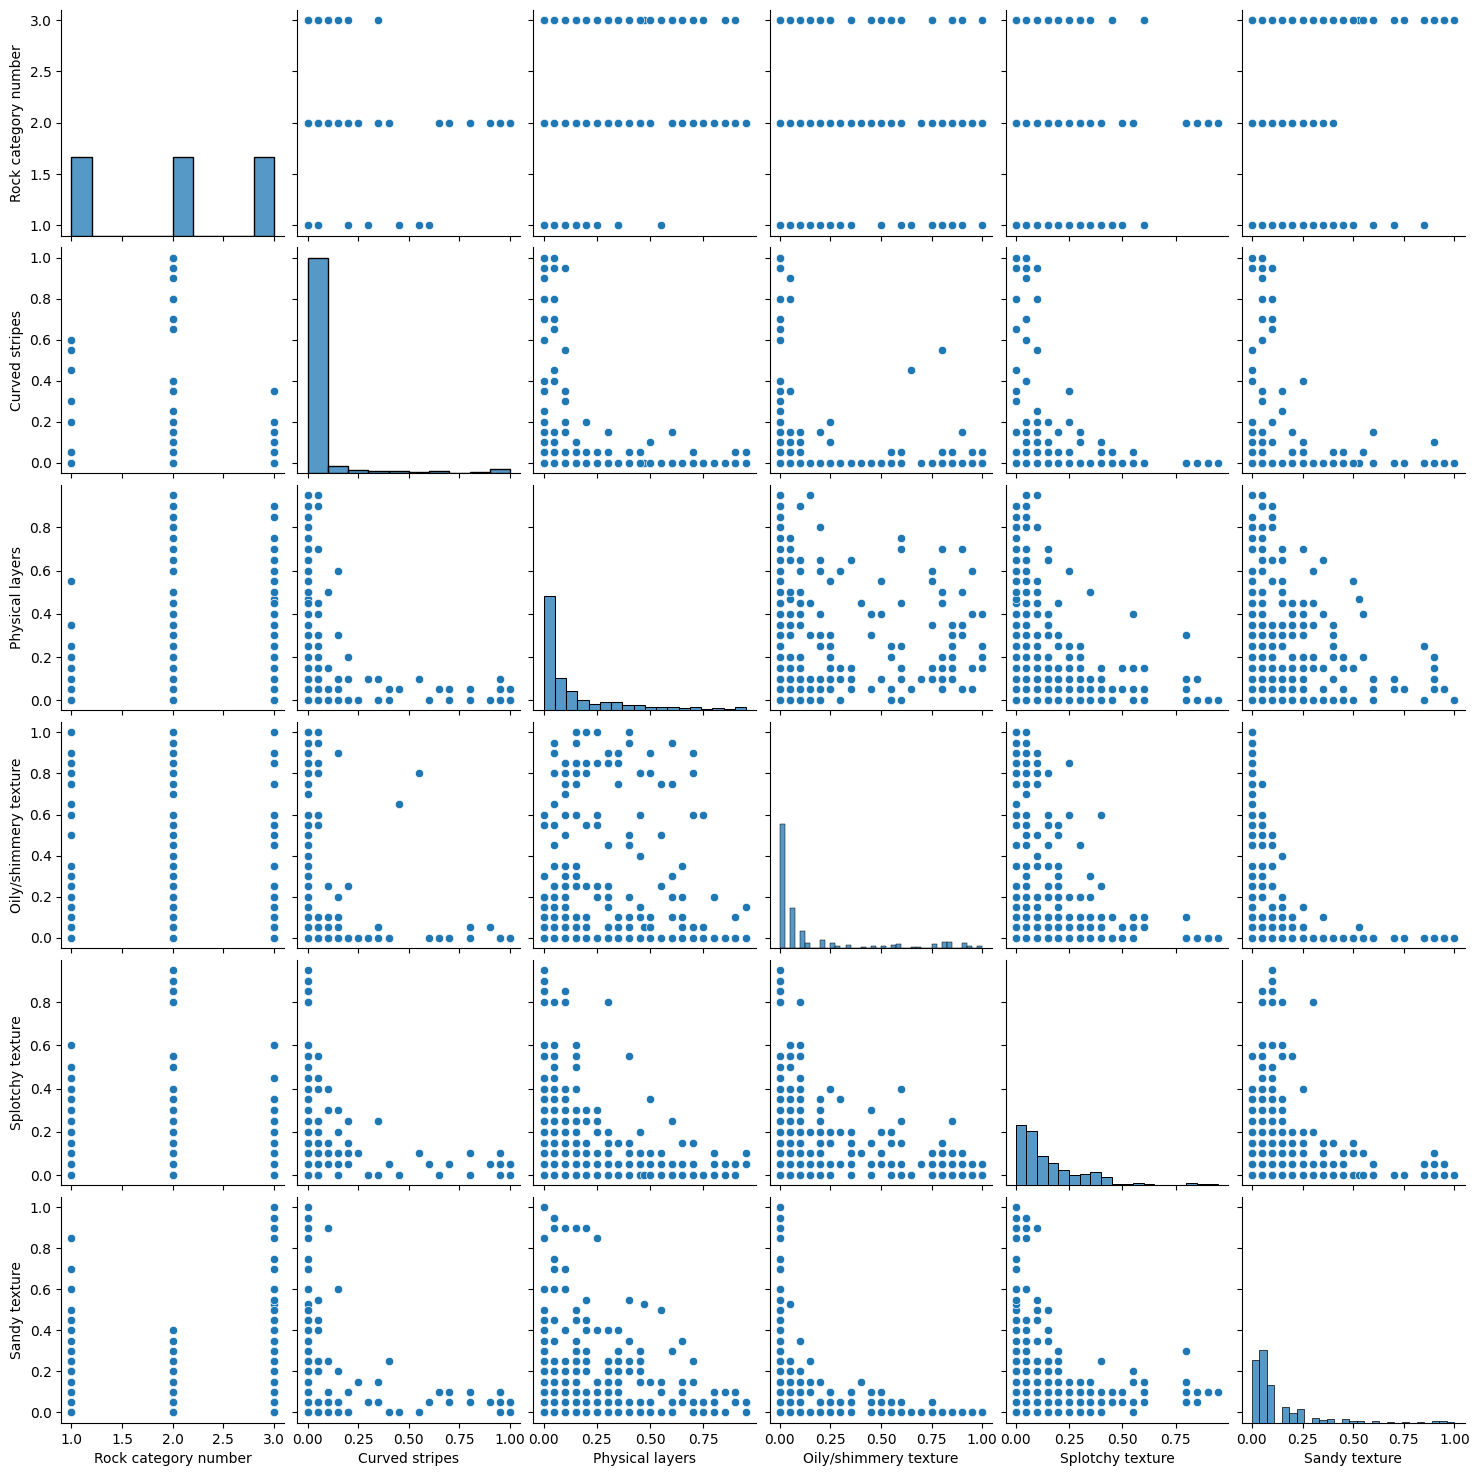

In [15]:
sns.pairplot(df[[
    "Rock category number", "Curved stripes", "Physical layers","Oily/shimmery texture", "Splotchy texture", "Sandy texture"
]])
plt.show()

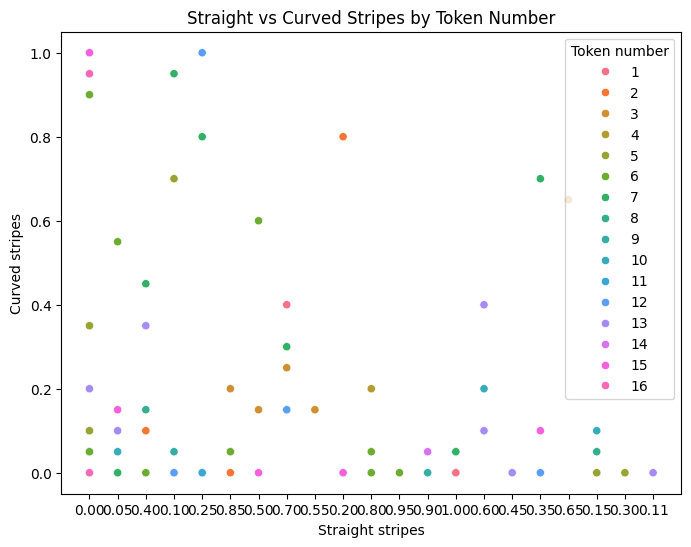

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Straight stripes", y="Curved stripes", hue="Token number")
plt.title("Straight vs Curved Stripes by Token Number")
plt.show()

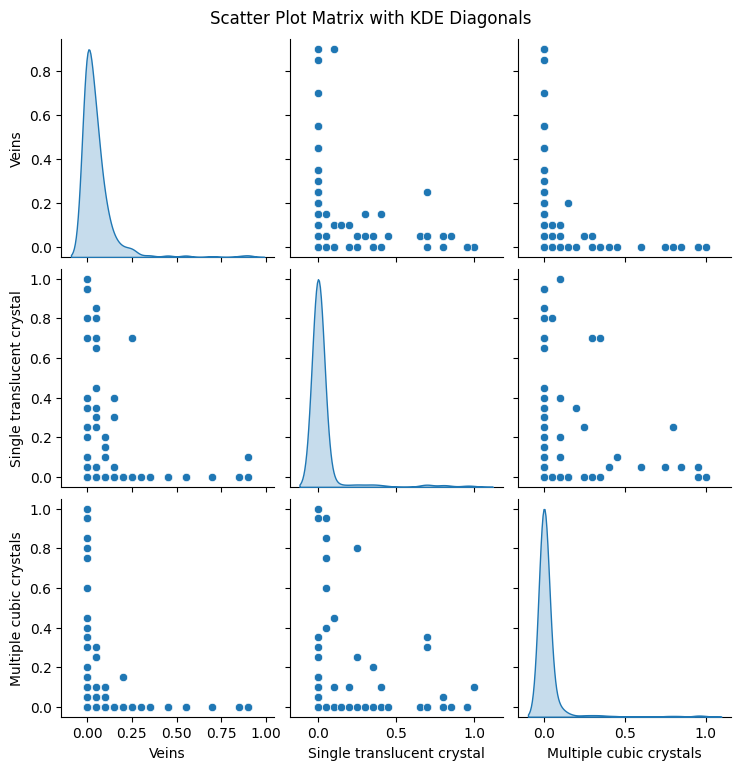

In [17]:
g = sns.pairplot(df[[
    "Veins", "Single translucent crystal",	"Multiple cubic crystals"
]], diag_kind="kde")
plt.suptitle("Scatter Plot Matrix with KDE Diagonals", y=1.02)
plt.show()

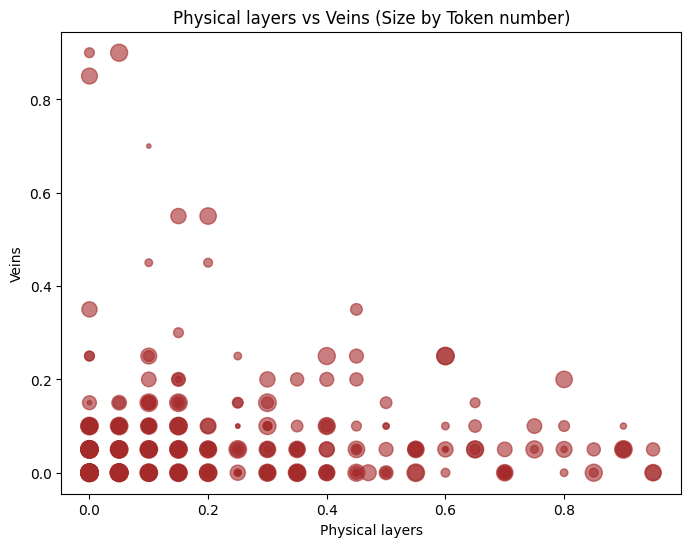

In [18]:
x = df["Physical layers"]
y = df["Veins"]

size_data = df["Token number"].astype(float) * 10

if len(x) == len(y) == len(size_data):
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, s=size_data, alpha=0.6, c="brown")
    plt.xlabel("Physical layers")
    plt.ylabel("Veins")
    plt.title("Physical layers vs Veins (Size by Token number)")
    plt.show()


In [19]:
features_column_names=df.columns.values.tolist()
for i in features_column_names:
    print(correlation_matrix[i].sort_values(ascending=False))

Rock category number          1.000000e+00
Subtype number                9.433333e-01
Physical layers               2.666991e-01
Single translucent crystal    2.589103e-01
Veins                         1.405526e-01
Sandy texture                 1.398446e-01
Multiple cubic crystals       1.138719e-01
Straight stripes              7.749481e-02
Rounded fragments             1.744612e-02
Oily/shimmery texture         8.171521e-03
Token number                 -9.070297e-16
Curved stripes               -1.745444e-02
Angular fragments            -1.224469e-01
Splotchy texture             -2.292728e-01
Name: Rock category number, dtype: float64
Subtype number                1.000000e+00
Rock category number          9.433333e-01
Physical layers               3.115185e-01
Single translucent crystal    2.818071e-01
Sandy texture                 2.208617e-01
Multiple cubic crystals       1.565635e-01
Veins                         1.301825e-01
Straight stripes              9.413767e-02
Token numbe

In [14]:
df['Token number'] = df['Token number'].astype(int)

df_train = df[df['Token number'].between(1, 10)]
df_validation = df[df['Token number'].between(11, 13)]
df_test= df[df['Token number'].between(14, 16)]

df_train = df_train.drop('Token number', axis=1)
df_validation = df_validation.drop('Token number', axis=1)
df_test = df_test.drop('Token number', axis=1)

print(df_train.shape)
print(df_validation.shape)
print(df_test.shape)

full_df = df
full_df= full_df.drop('Token number', axis=1)
X_train, Y_train= df_train.drop('Rock category number', axis=1) , df_train['Rock category number']
X_val, Y_val = df_validation.drop('Rock category number', axis=1), df_validation['Rock category number']
X_test, Y_test= df_test.drop('Rock category number', axis=1) , df_test['Rock category number']
X_full, Y_full = full_df.drop('Rock category number', axis=1) , full_df['Rock category number']
print(full_df.shape)

(300, 13)
(90, 13)
(90, 13)
(480, 13)


In [15]:
print(Y_train.value_counts())
print(Y_val.value_counts())
print(Y_test.value_counts())

Rock category number
1.0    100
2.0    100
3.0    100
Name: count, dtype: int64
Rock category number
1.0    30
2.0    30
3.0    30
Name: count, dtype: int64
Rock category number
1.0    30
2.0    30
3.0    30
Name: count, dtype: int64


In [16]:
X_train

,Subtype number,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture
0,1,0.20,0.15,0.00,0.0,0.00,0.05,0.00,0.30,0.0,0.00,0.10
1,1,0.65,0.15,0.00,0.0,0.05,0.00,0.00,0.10,0.0,0.05,0.05
2,1,0.60,0.00,0.00,0.0,0.05,0.00,0.00,0.35,0.0,0.00,0.05
3,1,0.10,0.85,0.00,0.0,0.05,0.00,0.00,0.10,0.0,0.00,0.10
4,1,0.35,0.80,0.00,0.0,0.00,0.00,0.00,0.10,0.0,0.00,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...
469,30,0.00,0.00,0.80,0.0,0.30,0.00,0.00,0.15,0.0,0.00,0.05
470,30,0.00,0.00,0.05,0.0,0.50,0.15,0.05,0.00,0.0,0.00,0.05
471,30,0.00,0.00,0.00,0.0,0.65,0.10,0.20,0.05,0.0,0.00,0.15
472,30,0.00,0.00,0.00,0.0,0.85,0.05,0.00,0.05,0.0,0.00,0.00


In [17]:
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Overall set : {df.shape[0]} samples")

Training set: 300 samples
Validation set: 90 samples
Testing set: 90 samples
Overall set : 480 samples


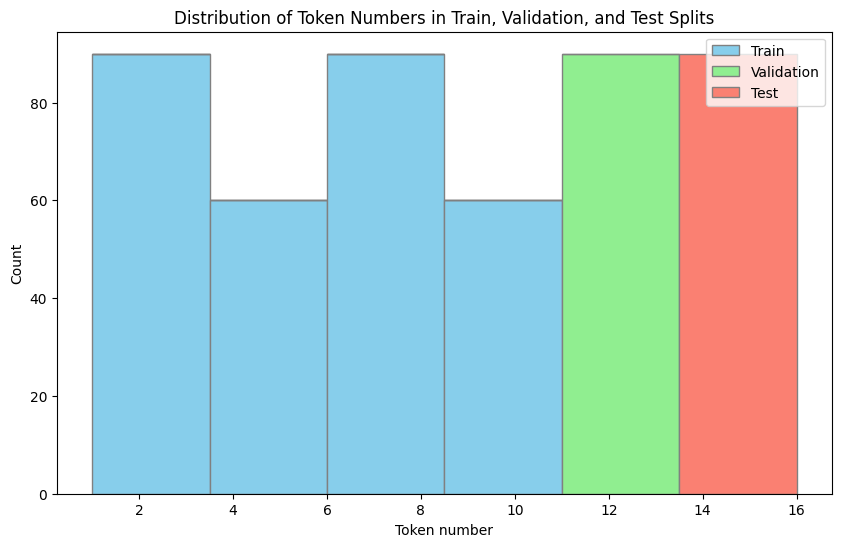

In [18]:
import matplotlib.pyplot as plt

df_train['Split'] = 'Train'
df_validation['Split'] = 'Validation'
df_test['Split'] = 'Test'

plt.figure(figsize=(10, 6))
plt.hist([df[df['Token number'].between(1, 10)]['Token number'],
          df[df['Token number'].between(11, 13)]['Token number'],
          df[df['Token number'].between(14, 16)]['Token number']],
         label=['Train', 'Validation', 'Test'], bins=6, stacked=True,
         color=['skyblue', 'lightgreen', 'salmon'], edgecolor='grey')

plt.xlabel('Token number')
plt.ylabel('Count')
plt.title('Distribution of Token Numbers in Train, Validation, and Test Splits')
plt.legend()
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print(X_train_scaled)
print(X_val_scaled)
print(X_test_scaled)

     Subtype number  Angular fragments  Rounded fragments  Straight stripes  \
0         -1.675247           0.629393           0.341350         -0.353840   
1         -1.675247           2.979823           0.341350         -0.353840   
2         -1.675247           2.718664          -0.398927         -0.353840   
3         -1.675247           0.107075           3.795976         -0.353840   
4         -1.675247           1.412870           3.549217         -0.353840   
..              ...                ...                ...               ...   
295        1.675247          -0.415243          -0.398927          3.480091   
296        1.675247          -0.415243          -0.398927         -0.114219   
297        1.675247          -0.415243          -0.398927         -0.353840   
298        1.675247          -0.415243          -0.398927         -0.353840   
299        1.675247          -0.415243          -0.398927         -0.353840   

     Curved stripes  Physical layers     Veins  Oil

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, accuracy_score,f1_score, recall_score

clf = LogisticRegression(multi_class='multinomial')

param_grid = {
    'C': [0.0001,0.001,0.01, 0.1],#1 10
    'solver': ['newton-cg', 'lbfgs', 'saga'],
    'max_iter': [100,200,300]#100 200 500
}


grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

grid_search.fit(X_train_scaled, Y_train)

best_params = grid_search.best_params_
print("best param:",best_params)

best_lr_clf = LogisticRegression(multi_class='multinomial', C=best_params['C'],
solver=best_params['solver'],max_iter=best_params['max_iter'])
best_lr_clf.fit(X_train_scaled, Y_train)

def evaluate_model(model, X, y, set_name):
    y_pred_log = model.predict(X)
    accuracy_log = accuracy_score(y, y_pred_log)
    precision_log = precision_score(y, y_pred_log, average='weighted')
    recall_log = recall_score(y, y_pred_log, average='weighted')
    f1_log = f1_score(y, y_pred_log, average='weighted')
    print(f"{set_name} Metrics:")
    print(f"Accuracy: {accuracy_log}")
    print(f"Precision: {precision_log}")
    print(f"Recall: {recall_log}")
    print(f"F1 Score: {f1_log}")

evaluate_model(best_lr_clf, X_train_scaled, Y_train, "Train")
evaluate_model(best_lr_clf, X_val_scaled, Y_val, "Validation")
evaluate_model(best_lr_clf, X_test_scaled, Y_test, "Test")

best param: {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}
Train Metrics:
Accuracy: 0.9133333333333333
Precision: 0.9133826864078965
Recall: 0.9133333333333333
F1 Score: 0.9132956628996234
Validation Metrics:
Accuracy: 0.8888888888888888
Precision: 0.8894500561167228
Recall: 0.8888888888888888
F1 Score: 0.8876357560568086
Test Metrics:
Accuracy: 0.9666666666666667
Precision: 0.9677419354838709
Recall: 0.9666666666666667
F1 Score: 0.966647823629169


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_clf = SVC()

param_grid = {
    'C': [0.0001, 0.001, 0.01,1,10],  # 0.001.0.1,1,10
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [1, 2, 3],
    'gamma': [0.01, 0.1, 1, 10], #scale and auto
}

grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid,cv=10,scoring='accuracy')

grid_search.fit(X_train_scaled, Y_train)

best_params = grid_search.best_params_
print("best parameters:", best_params, grid_search.best_score_)

best_svm_clf = SVC(**best_params)
best_svm_clf.fit(X_train_scaled, Y_train)


best parameters: {'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'} 0.8733333333333334


SVC(C=1, degree=1, gamma=0.01, kernel='linear')

In [22]:
evaluate_model(best_svm_clf, X_train_scaled, Y_train, "Train")
evaluate_model(best_svm_clf, X_val_scaled, Y_val, "Validation")
evaluate_model(best_svm_clf, X_test_scaled, Y_test, "Test")


Train Metrics:
Accuracy: 0.9933333333333333
Precision: 0.9933993399339935
Recall: 0.9933333333333333
F1 Score: 0.9933162470475903
Validation Metrics:
Accuracy: 0.9666666666666667
Precision: 0.9676724137931035
Recall: 0.9666666666666667
F1 Score: 0.9666484417714599
Test Metrics:
Accuracy: 0.9666666666666667
Precision: 0.9670003707823508
Recall: 0.9666666666666667
F1 Score: 0.9666574048346763


In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 75, 100],
    'max_depth': [50, 70, 90],
    'min_samples_split': [60, 75, 90],
    'min_samples_leaf': [65, 75, 85],
    'max_features': ['sqrt', 'log2']
}
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, Y_train)
best_params_rf = grid_search_rf.best_params_
print("Best parameters for Random Forest:", best_params_rf)
best_rf_clf = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_clf.fit(X_train_scaled, Y_train)
def evaluate_rf_model(model, X, y, set_name):
    y_pred_rf = model.predict(X)
    accuracy_rf = accuracy_score(y, y_pred_rf)
    precision_rf = precision_score(y, y_pred_rf, average='weighted')
    recall_rf = recall_score(y, y_pred_rf, average='weighted')
    f1_rf = f1_score(y, y_pred_rf, average='weighted')
    
    print(f"{set_name} Metrics:")
    print(f"Accuracy: {accuracy_rf}")
    print(f"Precision: {precision_rf}")
    print(f"Recall: {recall_rf}")
    print(f"F1 Score: {f1_rf}")
   # print(classification_report(y, y_pred_rf)) 

evaluate_rf_model(best_rf_clf, X_train_scaled, Y_train, "Train")
evaluate_rf_model(best_rf_clf, X_val_scaled, Y_val, "Validation")
evaluate_rf_model(best_rf_clf, X_test_scaled, Y_test, "Test")


Best parameters for Random Forest: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 65, 'min_samples_split': 60, 'n_estimators': 75}
Train Metrics:
Accuracy: 0.94
Precision: 0.9449541284403669
Recall: 0.94
F1 Score: 0.9383248330616752
Validation Metrics:
Accuracy: 0.9444444444444444
Precision: 0.9488636363636365
Recall: 0.9444444444444444
F1 Score: 0.9430712656519107
Test Metrics:
Accuracy: 0.9444444444444444
Precision: 0.9488636363636365
Recall: 0.9444444444444444
F1 Score: 0.9430712656519107


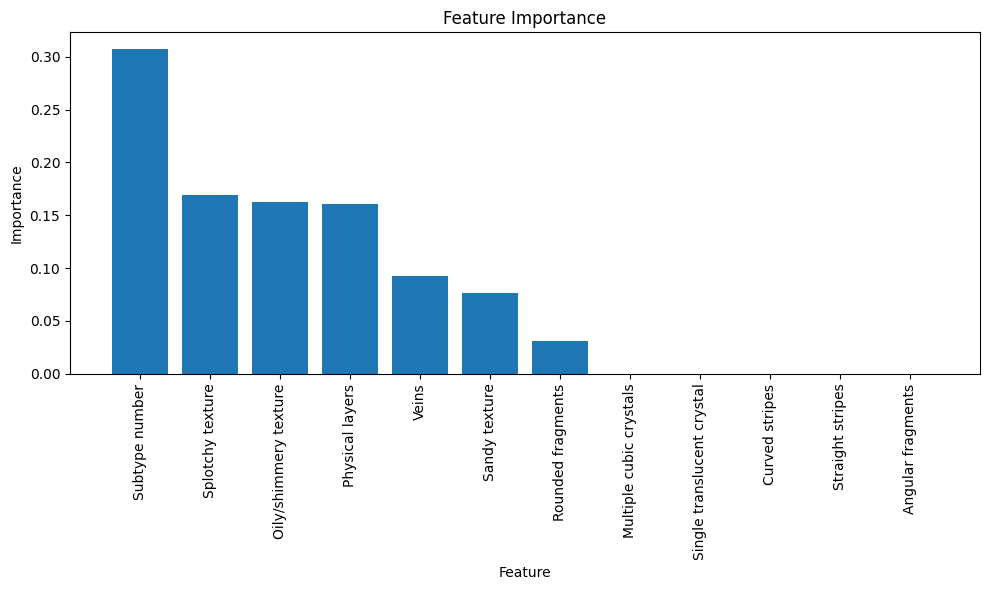

In [24]:
def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.bar(range(X_train_scaled.shape[1]), importances[indices], align="center")
    plt.xticks(range(X_train_scaled.shape[1]), np.array(feature_names)[indices], rotation=90)
    plt.xlim([-1, X_train_scaled.shape[1]])
    plt.ylabel("Importance")
    plt.xlabel("Feature")
    plt.tight_layout()
    plt.show()

feature_names = X_train.columns if hasattr(X_train, 'columns') else np.arange(X_train.shape[1])
plot_feature_importance(best_rf_clf, feature_names)

In [25]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf_clf = RandomForestClassifier(
    max_depth=50, max_features='sqrt', min_samples_leaf=65, min_samples_split=60, n_estimators=75, random_state=42
)
log_reg = LogisticRegression(max_iter=100, solver='newton-cg', random_state=42)
svm_clf = SVC(C=10, kernel='poly', degree=3, gamma='scale', probability=True, random_state=42)

ensemble_model = VotingClassifier(
    estimators=[
        ('random_forest', rf_clf),
        ('logistic_regression', log_reg),
        ('svm', svm_clf)
    ],
    voting='hard'
)
rf_clf.fit(X_train_scaled, Y_train)
log_reg.fit(X_train_scaled, Y_train)
svm_clf.fit(X_train_scaled, Y_train)

ensemble_model.fit(X_train_scaled, Y_train)

accuracy_scores = {}
model_classifiers = {
    'Random Forest': rf_clf,
    'Logistic Regression': log_reg,
    'SVM': svm_clf,
    'Ensemble Model': ensemble_model
}

def evaluate_model(model, X, y, set_name, model_name):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    
    print(f"{model_name} Metrics for {set_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    accuracy_scores[model_name + " " + set_name] = accuracy
    return f1  

print("\nEvaluating Individual Classifiers on Training Set:\n")
f1_scores_train = {}
f1_scores_train['Random Forest'] = evaluate_model(rf_clf, X_train_scaled, Y_train, "Train", "Random Forest")
f1_scores_train['Logistic Regression'] = evaluate_model(log_reg, X_train_scaled, Y_train, "Train", "Logistic Regression")
f1_scores_train['SVM'] = evaluate_model(svm_clf, X_train_scaled, Y_train, "Train", "SVM")

print("\nEvaluating Ensemble Model on Training Set:\n")
ensemble_f1_train = evaluate_model(ensemble_model, X_train_scaled, Y_train, "Train", "Ensemble Model")

print("\nEvaluating Individual Classifiers on Validation Set:\n")
f1_scores_val = {}
f1_scores_val['Random Forest'] = evaluate_model(rf_clf, X_val_scaled, Y_val, "Validation", "Random Forest")
f1_scores_val['Logistic Regression'] = evaluate_model(log_reg, X_val_scaled, Y_val, "Validation", "Logistic Regression")
f1_scores_val['SVM'] = evaluate_model(svm_clf, X_val_scaled, Y_val, "Validation", "SVM")


print("\nEvaluating Ensemble Model on Validation Set:\n")
ensemble_f1_val = evaluate_model(ensemble_model, X_val_scaled, Y_val, "Validation", "Ensemble Model")

print("\nEvaluating Individual Classifiers on Test Set:\n")
f1_scores_test = {}
f1_scores_test['Random Forest'] = evaluate_model(rf_clf, X_test_scaled, Y_test, "Test", "Random Forest")
f1_scores_test['Logistic Regression'] = evaluate_model(log_reg, X_test_scaled, Y_test, "Test", "Logistic Regression")
f1_scores_test['SVM'] = evaluate_model(svm_clf, X_test_scaled, Y_test, "Test", "SVM")

print("\nEvaluating Ensemble Model on Test Set:\n")
ensemble_f1_test = evaluate_model(ensemble_model, X_test_scaled, Y_test, "Test", "Ensemble Model")

print("\nF1 Scores Comparison:")
print(f"Random Forest - Train: {f1_scores_train['Random Forest']:.4f}, Validation: {f1_scores_val['Random Forest']:.4f}, Test: {f1_scores_test['Random Forest']:.4f}")
print(f"Logistic Regression - Train: {f1_scores_train['Logistic Regression']:.4f}, Validation: {f1_scores_val['Logistic Regression']:.4f}, Test: {f1_scores_test['Logistic Regression']:.4f}")
print(f"SVM - Train: {f1_scores_train['SVM']:.4f}, Validation: {f1_scores_val['SVM']:.4f}, Test: {f1_scores_test['SVM']:.4f}")
print(f"Ensemble Model - Train: {ensemble_f1_train:.4f}, Validation: {ensemble_f1_val:.4f}, Test: {ensemble_f1_test:.4f}")

best_model_name = max(f1_scores_test, key=f1_scores_test.get)
best_model_score = f1_scores_test[best_model_name]

model_train_accuracy = accuracy_scores[best_model_name + " Train"]
model_test_accuracy = accuracy_scores[best_model_name + " Test"]
best_model_classifier = model_classifiers[best_model_name]

print(f"\nBest Model on Test Set: {best_model_name} with F1 Score: {best_model_score:.4f}")
print(f"Ensemble Model F1 Score on Test Set: {ensemble_f1_test:.4f}")



Evaluating Individual Classifiers on Training Set:

Random Forest Metrics for Train:
Accuracy: 0.9400
Precision: 0.9450
Recall: 0.9400
F1 Score: 0.9383
Logistic Regression Metrics for Train:
Accuracy: 0.9867
Precision: 0.9868
Recall: 0.9867
F1 Score: 0.9867
SVM Metrics for Train:
Accuracy: 0.9667
Precision: 0.9689
Recall: 0.9667
F1 Score: 0.9669

Evaluating Ensemble Model on Training Set:

Ensemble Model Metrics for Train:
Accuracy: 0.9967
Precision: 0.9967
Recall: 0.9967
F1 Score: 0.9967

Evaluating Individual Classifiers on Validation Set:

Random Forest Metrics for Validation:
Accuracy: 0.9444
Precision: 0.9489
Recall: 0.9444
F1 Score: 0.9431
Logistic Regression Metrics for Validation:
Accuracy: 0.9556
Precision: 0.9562
Recall: 0.9556
F1 Score: 0.9551
SVM Metrics for Validation:
Accuracy: 0.9111
Precision: 0.9141
Recall: 0.9111
F1 Score: 0.9114

Evaluating Ensemble Model on Validation Set:

Ensemble Model Metrics for Validation:
Accuracy: 0.9556
Precision: 0.9562
Recall: 0.9556
F1 

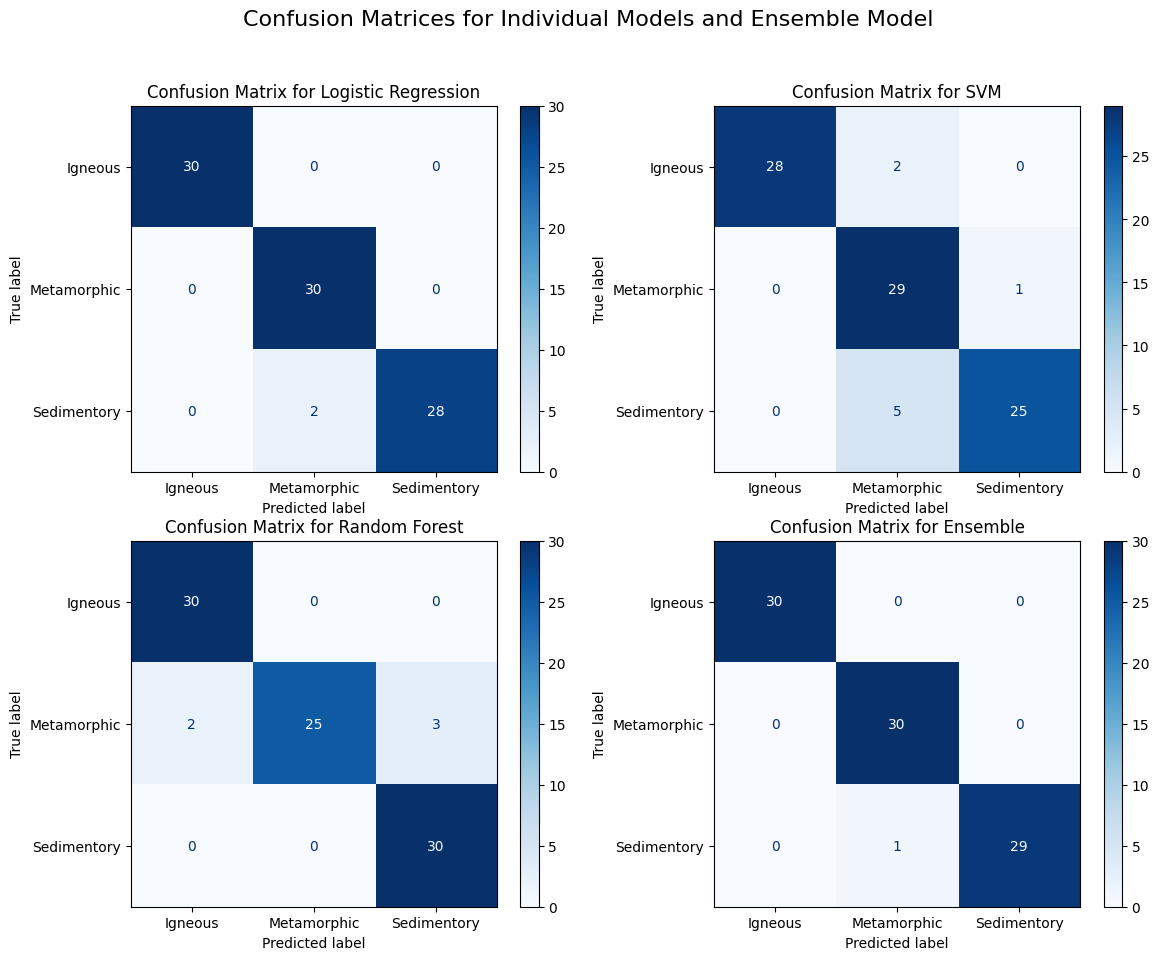

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

models = [log_reg, svm_clf, rf_clf, ensemble_model]
model_labels = ["Logistic Regression", "SVM", "Random Forest", "Ensemble"]
class_names = ["Igneous", "Metamorphic", "Sedimentory"]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Confusion Matrices for Individual Models and Ensemble Model", fontsize=16)

for ax, model, label in zip(axes.ravel(), models, model_labels):
    ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, Y_test, ax=ax, cmap='Blues', display_labels=class_names)
    ax.set_title(f'Confusion Matrix for {label}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [34]:
from scipy.stats import pearsonr
import pandas as pd
data = pd.read_csv('trialData.csv')

data = data[(data['rocknumber'] >= 1) & (data['rocknumber'] <= 480)]

train_data = data[data['block'].isin([1, 2, 3])]
test_data = data[data['block'] == 4]

print(train_data.shape)
print(test_data.shape)


(44273, 12)
(39354, 12)


In [35]:
train_human_accuracy = train_data['cat_correct'].mean()
test_human_accuracy = test_data['cat_correct'].mean()

print(f"Human Accuracy on Train Data: {train_human_accuracy:.2f}")
print(f"Human Accuracy on Test Data: {test_human_accuracy:.2f}")

print(f"Model Accuracy on Train Data: {model_train_accuracy:.2f}")
print(f"Model Accuracy on Test Data: {model_test_accuracy:.2f}")

print("Comparison:")
print(f"Human vs Model Train Accuracy Difference: {model_train_accuracy - train_human_accuracy:.2f}")
print(f"Human vs Model Test Accuracy Difference: {model_test_accuracy - test_human_accuracy:.2f}")

Human Accuracy on Train Data: 0.56
Human Accuracy on Test Data: 0.60
Model Accuracy on Train Data: 0.99
Model Accuracy on Test Data: 0.98
Comparison:
Human vs Model Train Accuracy Difference: 0.43
Human vs Model Test Accuracy Difference: 0.38


In [36]:
rock_stats = data.groupby('rocknumber')['cat_correct'].agg(['mean', 'std']).reset_index()
rock_stats.columns = ['rocknumber', 'avg_human_accuracy', 'std_human_accuracy']
print(rock_stats.head())  

   rocknumber  avg_human_accuracy  std_human_accuracy
0           1            0.746951            0.435423
1           2            0.719512            0.452002
2           3            0.451220            0.500677
3           4            0.500000            0.503077
4           5            0.512195            0.502927


In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.linear_model import LogisticRegression

base_model = LogisticRegression(class_weight="balanced", max_iter=100, solver='newton-cg', random_state=42)
calibrated_model = CalibratedClassifierCV(base_model, method='sigmoid', cv=5)

calibrated_model.fit(X_train_scaled, Y_train)

full_df= full_df.drop('Rock category number', axis=1, errors='ignore')
model_probabilities = calibrated_model.predict_proba(full_df)

class_probabilities = []
for i in range(480):
    class_probabilities.append(max(model_probabilities[i]))


In [41]:
rock_stats['model_probability'] = class_probabilities

class_probabilities = pd.DataFrame({
    'rocknumber': rock_stats['rocknumber'],
    'model_probability': class_probabilities
})

rock_stats.drop(columns='model_probability', inplace=True)

rock_stats = pd.merge(rock_stats, class_probabilities, on='rocknumber', how='left')

rock_stats.head(10)

,rocknumber,avg_human_accuracy,std_human_accuracy,model_probability
0,1,0.746951,0.435423,0.723976
1,2,0.719512,0.452002,0.748500
2,3,0.451220,0.500677,0.732923
3,4,0.500000,0.503077,0.737976
4,5,0.512195,0.502927,0.747141
5,6,0.851852,0.357460,0.734692
6,7,0.670732,0.472840,0.754622
7,8,0.402439,0.493407,0.721599
8,9,0.679878,0.467236,0.730952
9,10,0.719512,0.452002,0.736419


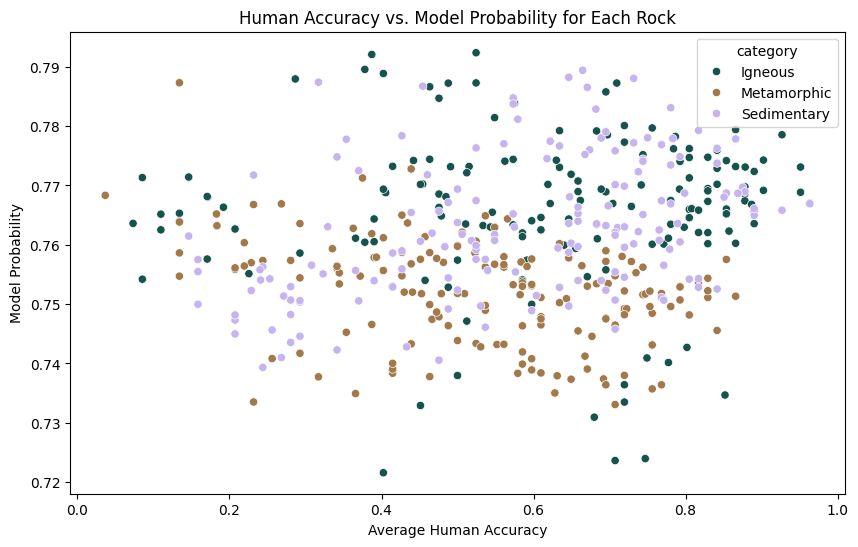

In [58]:
rock_category = data[['rocknumber', 'category']].drop_duplicates(subset='rocknumber')
rock_stats.drop(columns='category', inplace=True)
rock_stats = rock_stats.merge(rock_category, on='rocknumber', how='left')

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=rock_stats,
    x='avg_human_accuracy', y='model_probability',
    hue='category', palette='cubehelix'
)
plt.xlabel('Average Human Accuracy')
plt.ylabel('Model Probability')
plt.title('Human Accuracy vs. Model Probability for Each Rock')
plt.show()

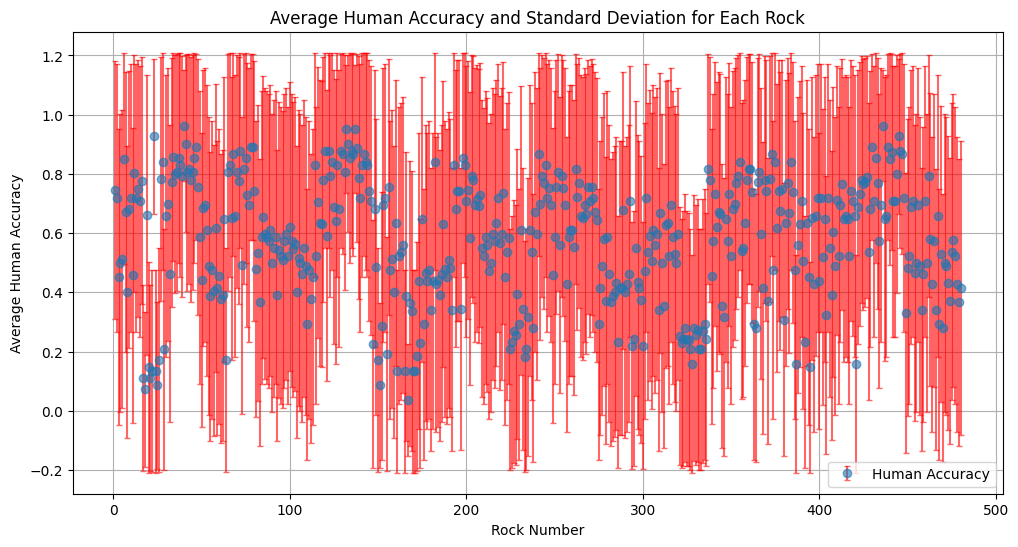

In [43]:
plt.figure(figsize=(12, 6))
plt.errorbar(rock_stats['rocknumber'], rock_stats['avg_human_accuracy'], 
             yerr=rock_stats['std_human_accuracy'], fmt='o', ecolor='r', capsize=2, alpha=0.6, label="Human Accuracy")

plt.xlabel('Rock Number')
plt.ylabel('Average Human Accuracy')
plt.title('Average Human Accuracy and Standard Deviation for Each Rock')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
results = []

for category in rock_stats['category'].unique():
    category_data = rock_stats[rock_stats['category'] == category]
    
    num_rocks = len(category_data)
    
    if num_rocks > 120:
        category_data = category_data.sample(n=120, random_state=42)
    elif num_rocks < 120:
        pass
    
    corr_coef, p_value = pearsonr(category_data['avg_human_accuracy'], category_data['model_probability'])
    
    results.append({
        'category': category,
        'correlation_coefficient': corr_coef,
        'p_value': p_value,
        'num_rocks_used': len(category_data) 
    })

correlation_results = pd.DataFrame(results)

overall_corr_coef, overall_p_value = pearsonr(rock_stats['avg_human_accuracy'], rock_stats['model_probability'])

overall_results = pd.DataFrame({
    'category': ['All Rocks'],
    'correlation_coefficient': [overall_corr_coef],
    'p_value': [overall_p_value],
    'num_rocks_used': len(rock_stats)
})

final_results = pd.concat([correlation_results, overall_results], ignore_index=True)

print(final_results)


      category  correlation_coefficient   p_value  num_rocks_used
0      Igneous                 0.027273  0.767470             120
1  Metamorphic                -0.397114  0.000007             120
2  Sedimentary                 0.386133  0.000013             120
3    All Rocks                 0.134614  0.003126             480
